# Bayesian Multivariate Normal Mean Model

The Bayesian multivariate normal mean model extends the univariate case by accounting for relationships between multiple parameters, allowing information from one variable to influence our beliefs about others through their correlation structure, which results in more precise posterior estimates than if we had treated each parameter independently.

# Graphical Summary

![fig](./graphical_summary/Slide26.png)

<!-- ![fig](./cartoons/Bayesian_multivariate_normal_mean_model.svg) -->

# Key Formula


The posterior distribution of the bivariate normal model is still multivariate normal, where the posterior precision matrix is the sum of the prior precision and the likelihood precision, and the posterior mean is a precision-weighted average of the prior mean and the observed data.

$$
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix}
 \sim \mathcal{N}
\left( 
\begin{pmatrix}
\beta_{a,0}  \\
\beta_{b,0}
\end{pmatrix},
\begin{pmatrix}
\sigma_{a}^2 & \rho \sigma_{a} \sigma_{b} \\
\rho \sigma_{a} \sigma_{b} & \sigma_{b}^2
\end{pmatrix}
\right)
$$

# Technical Details

## Model Assumptions

We assume the bivariate response vector follows a multivariate normal distribution:

$$
\mathbf{Y}_i = 
\begin{pmatrix}
Y_{i,a} \\
Y_{i,b}
\end{pmatrix}
\sim \mathcal{N}
\left( 
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix},
\boldsymbol{\Sigma}
\right)
$$

where:

- $\beta_a$ and $\beta_b$ are the unknown mean parameters we want to estimate
- $\boldsymbol{\Sigma}$ is the known covariance matrix:

$$
\boldsymbol{\Sigma} = 
\begin{pmatrix}
\sigma_a^2 & \rho \sigma_a \sigma_b \\
\rho \sigma_a \sigma_b & \sigma_b^2
\end{pmatrix}
$$

where $\sigma_a^2$ and $\sigma_b^2$ are the known variances, and $\rho$ is the known correlation between the two variables.

The Bayesian Normal Mean Model aims to infer the unknown parameters $\beta_a$ and $\beta_b$.

## Prior Distribution

We place a bivariate normal prior on the parameter vector:

$$
\boldsymbol{\beta} =
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix}
\sim \mathcal{N}
\left( 
\boldsymbol{\beta}_0,
\boldsymbol{\Sigma}_0
\right)
$$

where the prior mean is:
$$
\boldsymbol{\beta}_0 = 
\begin{pmatrix}
\beta_{a,0} \\
\beta_{b,0}
\end{pmatrix}
$$

and the prior covariance matrix is:
$$
\boldsymbol{\Sigma}_0 = 
\begin{pmatrix}
\sigma_{a,0}^2 & \rho_0 \sigma_{a,0} \sigma_{b,0} \\
\rho_0 \sigma_{a,0} \sigma_{b,0} & \sigma_{b,0}^2
\end{pmatrix}
$$

where $\beta_{a,0}$ and $\beta_{b,0}$ are the prior means, $\sigma_{a,0}^2$ and $\sigma_{b,0}^2$ are the prior variances, and $\rho_0$ is the prior correlation.

The **prior precision matrix** is:
$$
\boldsymbol{\Omega}_0 = \boldsymbol{\Sigma}_0^{-1}
$$

## Likelihood

For $n$ independent observations $\mathbf{Y}_1, \ldots, \mathbf{Y}_n$, the likelihood is:

$$
\mathbf{Y}_i \mid \beta_a, \beta_b \sim \mathcal{N}
\left( 
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix},
\boldsymbol{\Sigma}
\right)
$$

The joint likelihood for all observations is:

$$
p(\mathbf{Y}_1, \ldots, \mathbf{Y}_n \mid \beta_a, \beta_b) = \prod_{i=1}^n p(\mathbf{Y}_i \mid \beta_a, \beta_b)
$$

$$
\propto \exp\left( -\frac{1}{2} \sum_{i=1}^n (\mathbf{Y}_i - \boldsymbol{\beta})^T \boldsymbol{\Sigma}^{-1} (\mathbf{Y}_i - \boldsymbol{\beta}) \right)
$$

This can be rewritten using the sample mean $\overline{\mathbf{Y}} = \frac{1}{n}\sum_{i=1}^n \mathbf{Y}_i$:

$$
p(\mathbf{Y}_1, \ldots, \mathbf{Y}_n \mid \beta_a, \beta_b) \propto \exp\left( -\frac{n}{2} (\overline{\mathbf{Y}} - \boldsymbol{\beta})^T \boldsymbol{\Sigma}^{-1} (\overline{\mathbf{Y}} - \boldsymbol{\beta}) \right)
$$

The **likelihood precision matrix** is:
$$
\boldsymbol{\Omega} = n \boldsymbol{\Sigma}^{-1}
$$

## Posterior Distribution

Using Bayes' theorem and the conjugacy of the normal-normal model, the posterior distribution is:

$$
\boldsymbol{\beta} \mid \mathbf{Y}_1, \ldots, \mathbf{Y}_n \sim \mathcal{N}(\boldsymbol{\beta}_1, \boldsymbol{\Sigma}_1)
$$

where:

**Posterior precision matrix:**
$$
\boldsymbol{\Omega}_1 = \boldsymbol{\Omega}_0 + n\boldsymbol{\Sigma}^{-1}
$$

**Posterior covariance matrix:**
$$
\boldsymbol{\Sigma}_1 = \boldsymbol{\Omega}_1^{-1}
$$

**Posterior mean:**
$$
\boldsymbol{\beta}_1 = \boldsymbol{\Sigma}_1 \left( \boldsymbol{\Omega}_0 \boldsymbol{\beta}_0 + n\boldsymbol{\Sigma}^{-1} \overline{\mathbf{Y}} \right)
$$

This can be written component-wise as:
$$
\begin{pmatrix}
\beta_{a,1} \\
\beta_{b,1}
\end{pmatrix}
= \boldsymbol{\Sigma}_1 \left( \boldsymbol{\Omega}_0 
\begin{pmatrix}
\beta_{a,0} \\
\beta_{b,0}
\end{pmatrix}
+ n\boldsymbol{\Sigma}^{-1} 
\begin{pmatrix}
\overline{Y}_a \\
\overline{Y}_b
\end{pmatrix}
\right)
$$

## Key Properties

1. **Conjugacy**: The posterior has the same functional form as the prior (both multivariate normal)

2. **Precision weighting**: The posterior mean is a precision-weighted average of the prior mean and sample mean

3. **Information accumulation**: The posterior precision is the sum of prior precision and likelihood precision

4. **Correlation preservation**: The bivariate structure maintains correlations between parameters through the covariance matrices

# Example

This document demonstrates the Bayesian bivariate normal mean model for genetic effects on correlated traits (height $Y_a$ and weight $Y_b$). Unlike the univariate case where we estimate a single mean parameter, here we simultaneously estimate the means of two related variables while accounting for their correlation structure.

We model genetic effects as:
- $\beta_a$: genetic effect on height (cm per allele)  
- $\beta_b$: genetic effect on weight (kg per allele)
- **Prior**: 
  $$
  (\beta_a, \beta_b) \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_0)
  $$
- **Likelihood**: 
  $$
  \mathbf{Y}_i | \boldsymbol{\beta} \sim \mathcal{N}(X_i \boldsymbol{\beta}, \boldsymbol{\Sigma})
  $$
- **Posterior**: 
  $$
  (\beta_a, \beta_b) | \text{data} \sim \mathcal{N}(\boldsymbol{\beta}_1, \boldsymbol{\Sigma}_1)
  $$

In [22]:
rm(list=ls())
# Load required libraries
library(MASS)  # for multivariate normal sampling
library(ggplot2)
library(dplyr)
library(gridExtra)
set.seed(82)

## Data Generation

We first generate the data using simulations. 

Let's first define the true model parameters.


In [23]:
# True parameters for genetic effects (beta_a, beta_b)
sigma_a <- 5     # SD of genetic effect on height (cm per allele)
sigma_b <- 3     # SD of genetic effect on weight (kg per allele)
rho <- 0.7      # correlation between height and weight genetic effects

# True prior mean (center at zero)
beta_true_prior <- c(0, 0)

# True covariance matrix for genetic effects
Sigma_true <- matrix(c(
  sigma_a^2, rho * sigma_a * sigma_b,
  rho * sigma_a * sigma_b, sigma_b^2
), nrow = 2, byrow = TRUE)

n_individuals <- 5    # number of individuals
n_variants <- 1          # number of genetic variants (SINGLE VARIANT EXAMPLE)

# Baseline trait values (population means)
height_baseline <- 170   # cm
weight_baseline <- 70    # kg

# Independent error terms (epsilon)
height_epsilon_sd <- 8   # cm
weight_epsilon_sd <- 10  # kg

Then we draw the **true genetic effects** ($\beta_a, \beta_b$) from the specified distribution.


In [24]:
genetic_effects <- mvrnorm(n = n_variants, 
                          mu = beta_true_prior, 
                          Sigma = Sigma_true)

# Handle single variant case - ensure it's a matrix
if (n_variants == 1) {
  genetic_effects <- matrix(genetic_effects, nrow = 1)
}
colnames(genetic_effects) <- c("beta_a_height", "beta_b_weight")

print("Genetic effects for the single variant:")
print(genetic_effects)

[1] "Genetic effects for the single variant:"
     beta_a_height beta_b_weight
[1,]      6.268107      2.444654


And we also create **genotype data** for each individual (0, 1, or 2 copies of effect allele).


In [25]:
# Generate genotypes assuming MAF = 0.3 (Hardy-Weinberg equilibrium)
maf <- 0.3
p_genotypes <- c((1-maf)^2, 2*maf*(1-maf), maf^2)  # P(0), P(1), P(2)

genotypes <- matrix(
  sample(0:2, size = n_individuals * n_variants, 
         replace = TRUE, prob = p_genotypes),
  nrow = n_individuals, ncol = n_variants
)

We compute the genetic effect for each individual by multiplying the genetic effect and the genotype data for each individual.

In [26]:
# For single variant, this is just genotype * effect
genetic_height <- genotypes[, 1] * genetic_effects[1, "beta_a_height"]
genetic_weight <- genotypes[, 1] * genetic_effects[1, "beta_b_weight"]

print("Genetic contribution statistics:")
print("Height genetic effects:")
print(summary(genetic_height))
print("Weight genetic effects:")
print(summary(genetic_weight))


[1] "Genetic contribution statistics:"
[1] "Height genetic effects:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.507   6.268   6.268 
[1] "Weight genetic effects:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9779  2.4447  2.4447 


We then add the independent epsilon terms to each trait.

In [27]:
# Add independent environmental effects (epsilon terms)
height_epsilon <- rnorm(n_individuals, mean = 0, sd = height_epsilon_sd)
weight_epsilon <- rnorm(n_individuals, mean = 0, sd = weight_epsilon_sd)

print("Error term statistics:")
print(paste("Height epsilon SD:", round(sd(height_epsilon), 2)))
print(paste("Weight epsilon SD:", round(sd(weight_epsilon), 2)))
epsilon_corr <- cor(height_epsilon, weight_epsilon)
print(paste("Epsilon correlation (should be ~0):", round(epsilon_corr, 3)))


[1] "Error term statistics:"
[1] "Height epsilon SD: 7.78"
[1] "Weight epsilon SD: 10.44"
[1] "Epsilon correlation (should be ~0): 0.275"


The final trait values are:

In [28]:
# Calculate final trait values
final_height <- height_baseline + genetic_height + height_epsilon
final_weight <- weight_baseline + genetic_weight + weight_epsilon

# Create comprehensive dataset
individuals <- data.frame(
  id = 1:n_individuals,
  height = final_height,
  weight = final_weight,
  genetic_height = genetic_height,
  genetic_weight = genetic_weight,
  height_epsilon = height_epsilon,
  weight_epsilon = weight_epsilon
)

## (optional) Heritability

In [29]:
# Calculate heritabilities
height_var_genetic <- var(individuals$genetic_height)
height_var_total <- var(individuals$height)
height_heritability <- height_var_genetic / height_var_total

weight_var_genetic <- var(individuals$genetic_weight)
weight_var_total <- var(individuals$weight)
weight_heritability <- weight_var_genetic / weight_var_total

cat("\nHeritability estimates:\n")
cat("Height heritability:", round(height_heritability, 3), "\n")
cat("Weight heritability:", round(weight_heritability, 3), "\n")


Heritability estimates:
Height heritability: 0.267 


Weight heritability: 0.014 



## Bayesian Inference

Now we perform Bayesian inference to recover the genetic effects from the generated data.


In [30]:
# Select variant for detailed Bayesian analysis
variant_idx <- 1
true_beta_a <- genetic_effects[variant_idx, "beta_a_height"]
true_beta_b <- genetic_effects[variant_idx, "beta_b_weight"]

# Extract data for this variant
X <- genotypes[, variant_idx]  # genotype vector 
Y <- cbind(individuals$height, individuals$weight)  # observed traits


### Prior Specification

Define the prior distribution for genetic effects.

In [31]:
cat("=== PRIOR SPECIFICATION ===\n")

# Prior mean (no prior knowledge, center at zero)
beta_0 <- c(0, 0)

# Prior covariance matrix (using same parameters as data generation)
Sigma_0 <- matrix(c(
  sigma_a^2, rho * sigma_a * sigma_b,
  rho * sigma_a * sigma_b, sigma_b^2
), nrow = 2, byrow = TRUE)

cat("Prior mean beta_0:\n")
print(beta_0)
cat("Prior covariance matrix Sigma_0:\n")
print(Sigma_0)

# Prior precision matrix
Omega_0 <- solve(Sigma_0)
cat("Prior precision matrix Omega_0:\n")
print(round(Omega_0, 4))

prior_corr <- Sigma_0[1,2] / sqrt(Sigma_0[1,1] * Sigma_0[2,2])
cat("Prior correlation:", round(prior_corr, 3), "\n")


=== PRIOR SPECIFICATION ===


Prior mean beta_0:
[1] 0 0
Prior covariance matrix Sigma_0:
     [,1] [,2]
[1,] 25.0 10.5
[2,] 10.5  9.0
Prior precision matrix Omega_0:
        [,1]    [,2]
[1,]  0.0784 -0.0915
[2,] -0.0915  0.2179
Prior correlation: 0.7 


### Likelihood Specification

Define the likelihood model for observed data.


In [32]:
cat("=== LIKELIHOOD SPECIFICATION ===\n")

# Likelihood: Y_i | beta ~ MVN(X_i * beta, Sigma)
# Independent error covariance matrix
Sigma <- diag(c(height_epsilon_sd^2, weight_epsilon_sd^2))

cat("Residual covariance matrix Sigma:\n")
print(Sigma)

# Likelihood precision matrix
Omega <- solve(Sigma)
cat("Residual precision matrix Omega:\n")
print(Omega)

cat("Model specification:\n")
cat("- Each individual i has genotype X_i and traits Y_i = (height_i, weight_i)\n")
cat("- Y_i | beta ~ MVN(X_i * beta, Sigma)\n")
cat("- X_i affects both traits through beta = (beta_a, beta_b)\n")


=== LIKELIHOOD SPECIFICATION ===


Residual covariance matrix Sigma:
     [,1] [,2]
[1,]   64    0
[2,]    0  100
Residual precision matrix Omega:
         [,1] [,2]
[1,] 0.015625 0.00
[2,] 0.000000 0.01
Model specification:
- Each individual i has genotype X_i and traits Y_i = (height_i, weight_i)
- Y_i | beta ~ MVN(X_i * beta, Sigma)
- X_i affects both traits through beta = (beta_a, beta_b)


### Posterior Calculation

Apply Bayesian updating using conjugate prior formulas.

In [33]:
cat("=== POSTERIOR CALCULATION ===\n")

# For multivariate normal conjugate prior:
# Posterior precision: Omega_1 = Omega_0 + sum(X_i^T Omega X_i)
# Posterior mean: beta_1 = Sigma_1 * (Omega_0 * beta_0 + sum(X_i^T Omega Y_i))

cat("Computing sufficient statistics...\n")

# Initialize sufficient statistics
XtOmegaX <- matrix(0, nrow = 2, ncol = 2)
XtOmegaY <- c(0, 0)

# Accumulate across all individuals
for (i in 1:n_individuals) {
  x_i <- X[i]  # genotype for individual i
  y_i <- Y[i, ]  # traits for individual i
  
  # Design matrix: genotype affects both traits
  X_i <- diag(c(x_i, x_i))  # 2x2 diagonal matrix with genotype
  
  XtOmegaX <- XtOmegaX + t(X_i) %*% Omega %*% X_i
  XtOmegaY <- XtOmegaY + t(X_i) %*% Omega %*% y_i
}

cat("Sufficient statistic X^T Omega X:\n")
print(round(XtOmegaX, 2))
cat("Sufficient statistic X^T Omega Y:\n")
print(round(XtOmegaY, 2))

# Calculate posterior parameters
Omega_1 <- Omega_0 + XtOmegaX
Sigma_1 <- solve(Omega_1)
beta_1 <- Sigma_1 %*% (Omega_0 %*% beta_0 + XtOmegaY)

=== POSTERIOR CALCULATION ===
Computing sufficient statistics...


Sufficient statistic X^T Omega X:
     [,1] [,2]
[1,] 0.03 0.00
[2,] 0.00 0.02
Sufficient statistic X^T Omega Y:
     [,1]
[1,] 5.17
[2,] 1.38


Here are the posterior results:

In [34]:
cat("=== POSTERIOR RESULTS ===\n")
cat("Posterior mean beta_1:\n")
cat("  beta_a (height):", round(beta_1[1], 4), "\n")
cat("  beta_b (weight):", round(beta_1[2], 4), "\n")

cat("Posterior covariance matrix Sigma_1:\n")
print(round(Sigma_1, 6))

posterior_corr <- Sigma_1[1,2] / sqrt(Sigma_1[1,1] * Sigma_1[2,2])
cat("Posterior correlation:", round(posterior_corr, 4), "\n")

# Posterior standard errors
posterior_se <- sqrt(diag(Sigma_1))
cat("Posterior standard errors:\n")
cat("  SE(beta_a):", round(posterior_se[1], 4), "\n")
cat("  SE(beta_b):", round(posterior_se[2], 4), "\n")

cat("\nComparison with true values:\n")
cat("True beta_a:", round(true_beta_a, 4), "\n")
cat("True beta_b:", round(true_beta_b, 4), "\n")

=== POSTERIOR RESULTS ===
Posterior mean beta_1:
  beta_a (height): 76.4961 
  beta_b (weight): 35.2305 
Posterior covariance matrix Sigma_1:
          [,1]     [,2]
[1,] 13.426178 5.164861
[2,]  5.164861 6.190915
Posterior correlation: 0.5665 
Posterior standard errors:
  SE(beta_a): 3.6642 
  SE(beta_b): 2.4882 

Comparison with true values:
True beta_a: 6.2681 
True beta_b: 2.4447 


# Supplementary

## Graphical Summary

Bayesian Bivariate Normal Mean Model Summary:
Prior mean: 2 2 
Sample mean: 5.36 3.188 
Posterior mean: 5.053 3.062 
True mean: 4 3 
Sample size: 5 


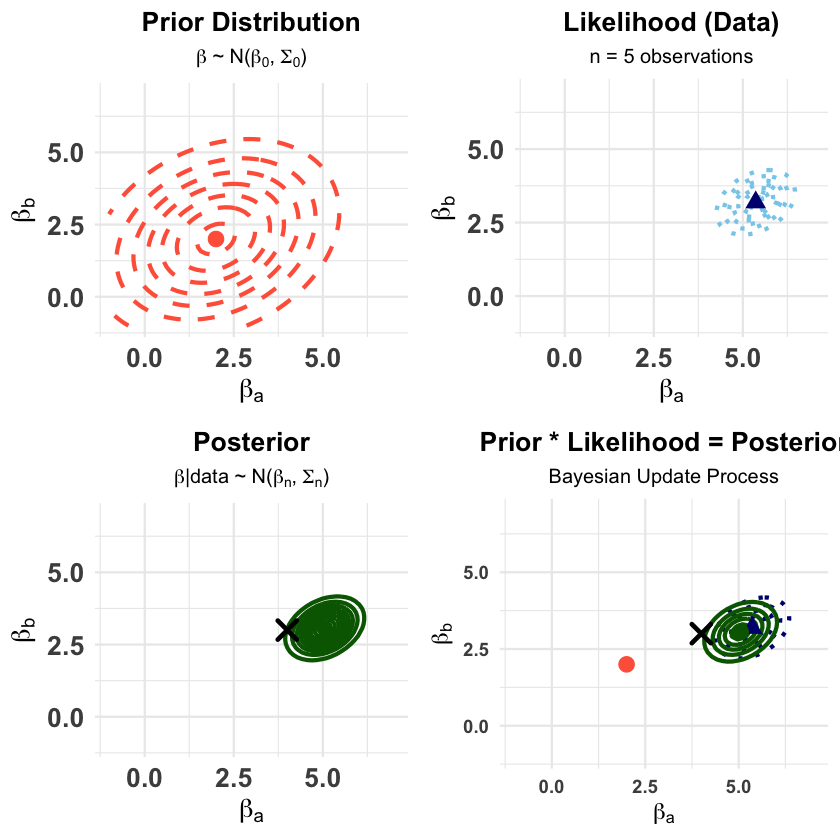

In [19]:
library(ggplot2)
library(mvtnorm)
library(gridExtra)
library(dplyr)

# Suppress warnings for cleaner output
options(warn = -1)

# Set random seed for reproducibility
set.seed(42)

# Function to create contour data for bivariate normal (improved)
create_contour_data <- function(mu, sigma, xlim = c(-1, 7), ylim = c(-1, 7), n = 60) {
  x <- seq(xlim[1], xlim[2], length.out = n)
  y <- seq(ylim[1], ylim[2], length.out = n)
  grid <- expand.grid(x = x, y = y)
  
  # Calculate density and handle potential numerical issues
  density_vals <- tryCatch({
    dmvnorm(as.matrix(grid), mean = mu, sigma = sigma)
  }, error = function(e) {
    rep(1e-10, nrow(grid))
  })
  
  # Filter out very small densities and ensure positive values
  grid$density <- pmax(density_vals, 1e-8)
  
  # Remove rows where density is essentially zero to avoid contour issues
  grid <- grid[grid$density > 1e-6, ]
  
  return(grid)
}

# Parameters for the Bayesian model
# Prior parameters (less informative to make posterior more visible)
beta_0 <- c(2, 2)  # Prior mean
sigma_0 <- matrix(c(3, 0.8, 0.8, 3), 2, 2)  # Prior covariance (larger)

# True parameters (unknown in practice)
beta_true <- c(4, 3)
sigma_true <- matrix(c(1.5, 0.5, 0.5, 1.5), 2, 2)  # Larger covariance

# Generate observed data
n <- 5
observed_data <- rmvnorm(n, mean = beta_true, sigma = sigma_true)
sample_mean <- colMeans(observed_data)

# Bayesian update (assuming known covariance for simplicity)
# Posterior parameters
sigma_0_inv <- solve(sigma_0)
sigma_true_inv <- solve(sigma_true)
sigma_post_inv <- sigma_0_inv + n * sigma_true_inv
sigma_post <- solve(sigma_post_inv)
beta_post <- sigma_post %*% (sigma_0_inv %*% beta_0 + n * sigma_true_inv %*% sample_mean)

# Create contour data for all distributions
prior_data <- create_contour_data(beta_0, sigma_0)
likelihood_data <- create_contour_data(sample_mean, sigma_true/n)
posterior_data <- create_contour_data(beta_post, sigma_post)

# Create individual plots with consistent styling
base_theme <- theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    axis.title.y = element_text(face = "bold", size = 16),
    axis.title.x = element_text(face = "bold", size = 16),
    axis.text.x = element_text(face = "bold", size = 16),
    axis.text.y = element_text(face = "bold", size = 16)
  )

# Prior plot
p1 <- ggplot(prior_data, aes(x = x, y = y, z = density)) +
  geom_contour(color = "tomato", linewidth = 1.2, bins = 8, linetype = "dashed") +
  geom_point(data = data.frame(x = beta_0[1], y = beta_0[2]), 
             aes(x = x, y = y), color = "tomato", size = 4, inherit.aes = FALSE) +
  labs(title = "Prior Distribution", 
       subtitle = expression(paste(beta, " ~ N(", beta[0], ", ", Sigma[0], ")")),
       x = expression(beta[a]), y = expression(beta[b])) +
  xlim(-1, 7) + ylim(-1, 7) +
  base_theme

# Likelihood plot  
p2 <- ggplot(likelihood_data, aes(x = x, y = y, z = density)) +
  geom_contour(color = "skyblue", linewidth = 1.2, bins = 8, linetype = "dotted") +
  geom_point(data = data.frame(x = sample_mean[1], y = sample_mean[2]), 
             aes(x = x, y = y), color = "#000080", size = 4, shape = 17, inherit.aes = FALSE) +
  labs(title = "Likelihood (Data)", 
       subtitle = paste("n =", n, "observations"),
       x = expression(beta[a]), y = expression(beta[b])) +
  xlim(-1, 7) + ylim(-1, 7) +
  base_theme

# Posterior plot
p3 <- ggplot(posterior_data, aes(x = x, y = y, z = density)) +
  geom_contour(color = "darkgreen", linewidth = 1.2, bins = 10, linetype = "solid") +
  geom_point(data = data.frame(x = beta_post[1], y = beta_post[2]), 
             aes(x = x, y = y), color = "darkgreen", size = 4, inherit.aes = FALSE) +
  geom_point(data = data.frame(x = beta_true[1], y = beta_true[2]), 
             aes(x = x, y = y), color = "black", size = 4, shape = 4, stroke = 2, inherit.aes = FALSE) +
  labs(title = "Posterior", 
       subtitle = expression(paste(beta, "|data ~ N(", beta[n], ", ", Sigma[n], ")")),
       x = expression(beta[a]), y = expression(beta[b])) +
  xlim(-1, 7) + ylim(-1, 7) +
  base_theme

# Combined plot showing all three
combined_data <- rbind(
  cbind(prior_data, distribution = "Prior"),
  cbind(likelihood_data, distribution = "Likelihood"), 
  cbind(posterior_data, distribution = "Posterior")
)

p4 <- ggplot(combined_data, aes(x = x, y = y, z = density, color = distribution, linetype = distribution)) +
  geom_contour(linewidth = 1.2, bins = 6) +
  scale_color_manual(values = c("Prior" = "tomato", 
                               "Likelihood" = "#000080", 
                               "Posterior" = "darkgreen")) +
  scale_linetype_manual(values = c("Prior" = "dashed", 
                                  "Likelihood" = "dotted", 
                                  "Posterior" = "solid")) +
  geom_point(data = data.frame(x = beta_0[1], y = beta_0[2]), 
             aes(x = x, y = y), color = "tomato", size = 4, inherit.aes = FALSE) +
  geom_point(data = data.frame(x = sample_mean[1], y = sample_mean[2]), 
             aes(x = x, y = y), color = "#000080", size = 4, shape = 17, inherit.aes = FALSE) +
  geom_point(data = data.frame(x = beta_post[1], y = beta_post[2]), 
             aes(x = x, y = y), color = "darkgreen", size = 4, inherit.aes = FALSE) +
  geom_point(data = data.frame(x = beta_true[1], y = beta_true[2]), 
             aes(x = x, y = y), color = "black", size = 4, shape = 4, stroke = 2, inherit.aes = FALSE) +
  labs(title = "Prior * Likelihood = Posterior",
       subtitle = "Bayesian Update Process",
       x = expression(beta[a]), y = expression(beta[b]),
       color = "Distribution",
       linetype = "Distribution") +
  xlim(-1, 7) + ylim(-1, 7) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold"),
    axis.text.y = element_text(face = "bold"),
    legend.title = element_blank(),
    legend.text = element_blank(),
    legend.position = "none"
  ) +
  guides(color = guide_legend(override.aes = list(linewidth = 1.5)),
         linetype = guide_legend(override.aes = list(linewidth = 1.5)))

# Arrange the plots in 2x2 grid
final_plot <- grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)

# Save the combined plot
ggsave("./cartoons/Bayesian_multivariate_normal_mean_model.png", plot = final_plot,
       width = 12, height = 8, 
       bg = "transparent",
       dpi = 300)

# Reset warnings
options(warn = 0)

# Print summary statistics
cat("Bayesian Bivariate Normal Mean Model Summary:\n")
cat("============================================\n")
cat("Prior mean:", round(beta_0, 3), "\n")
cat("Sample mean:", round(sample_mean, 3), "\n") 
cat("Posterior mean:", round(beta_post, 3), "\n")
cat("True mean:", round(beta_true, 3), "\n")
cat("Sample size:", n, "\n")